# pvlib-Python Forecasting (Albuquerque, NM)
### Install Standard Release 

In [1]:
# pip Upgrade
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Module siphon was not found
!pip install siphon

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2


# Try to save Excel
!pip install openpyxl

In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
%matplotlib inline

# Specify Location (Albuiquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

# Specify time range
start = pd.Timestamp(datetime.date.fromordinal(737597), tz=tz)
end = start + pd.Timedelta(days=1)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


### Create Model

In [4]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Total_cloud_cover_middle_cloud_Mixed_intervals_Average  \
2020-06-21 06:00:00-06:00                                                4.0        
2020-06-21 09:00:00-06:00                                                0.0        
2020-06-21 12:00:00-06:00                                                0.0        
2020-06-21 15:00:00-06:00                                                0.0        
2020-06-21 18:00:00-06:00                                                0.0        

                           Wind_speed_gust_surface  \
2020-06-21 06:00:00-06:00                 2.900171   
2020-06-21 09:00:00-06:00                 1.617239   
2020-06-21 12:00:00-06:00                 2.999981   
2020-06-21 15:00:00-06:00                 2.149991   
2020-06-21 18:00:00-06:00                 4.670995   

                           Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average  \
2020-06-21 06:00:00-06:00                                                5

### Process Data with pvlib

In [5]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-21 06:00:00-06:00  17.994354    2.744383    0.324032    0.000000   
2020-06-21 09:00:00-06:00  14.970459    1.519739  514.955912  669.120702   
2020-06-21 12:00:00-06:00  14.104706    2.989138  703.980322  253.134602   
2020-06-21 15:00:00-06:00  31.911102    2.085059  737.201592  412.690628   
2020-06-21 18:00:00-06:00  45.050995    2.876819  330.305271  397.446341   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-21 06:00:00-06:00    0.324032           5.0         0.0         4.0   
2020-06-21 09:00:00-06:00  126.892221           2.0         0.0         0.0   
2020-06-21 12:00:00-06:00  464.388260          38.0         0.0         0.0   
2020-06-21 15:00:00-06:00  368.954491          24.0         0.0         0.0   
2020-06-21 18:00:00-06:00  151.806565          19.0         0.0         0.0   

                           high_clouds  
2020-06-21 06:00:00-06:00  

### GFS'S Class

In [6]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-21 06:00:00-06:00  17.994354    2.744383    0.324032    0.000000   
2020-06-21 09:00:00-06:00  14.970459    1.519739  514.955912  669.120702   
2020-06-21 12:00:00-06:00  14.104706    2.989138  703.980322  253.134602   
2020-06-21 15:00:00-06:00  31.911102    2.085059  737.201592  412.690628   
2020-06-21 18:00:00-06:00  45.050995    2.876819  330.305271  397.446341   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-21 06:00:00-06:00    0.324032           5.0         0.0         4.0   
2020-06-21 09:00:00-06:00  126.892221           2.0         0.0         0.0   
2020-06-21 12:00:00-06:00  464.388260          38.0         0.0         0.0   
2020-06-21 15:00:00-06:00  368.954491          24.0         0.0         0.0   
2020-06-21 18:00:00-06:00  151.806565          19.0         0.0         0.0   

                           high_clouds  
2020-06-21 06:00:00-06:00  

## Cloud Cover & Radiation

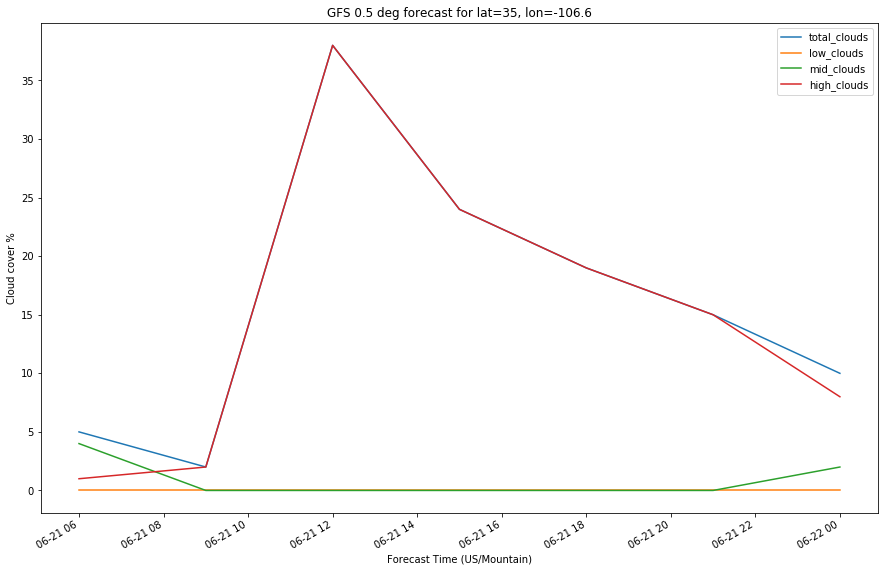

In [7]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

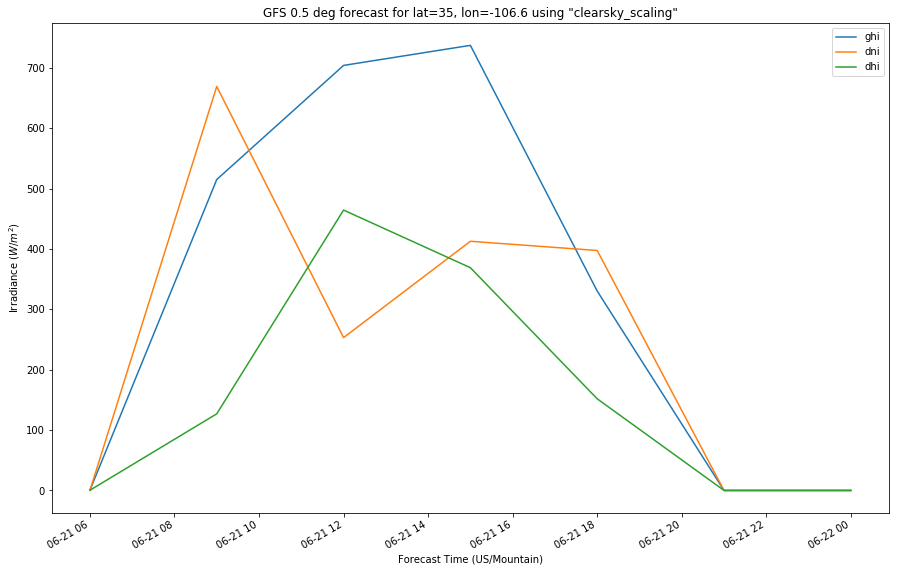

In [8]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

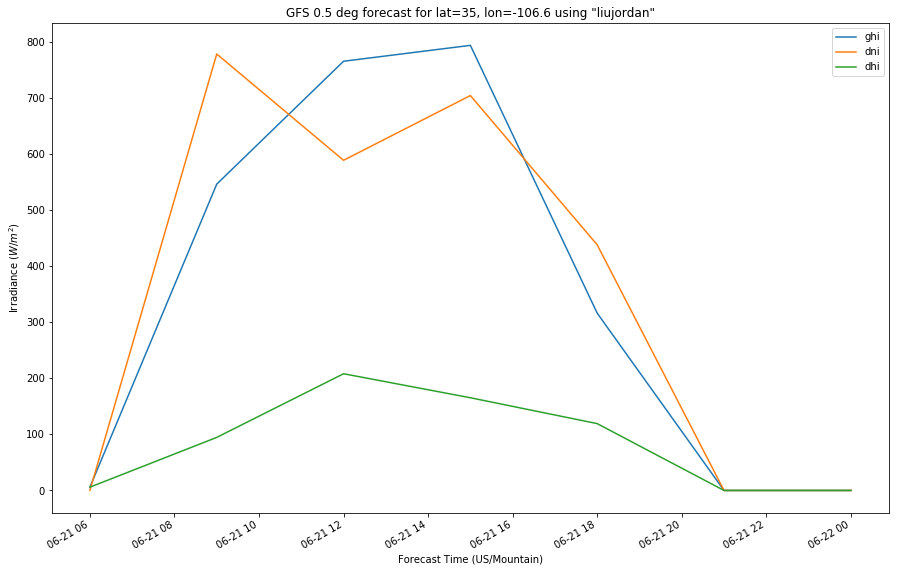

In [9]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

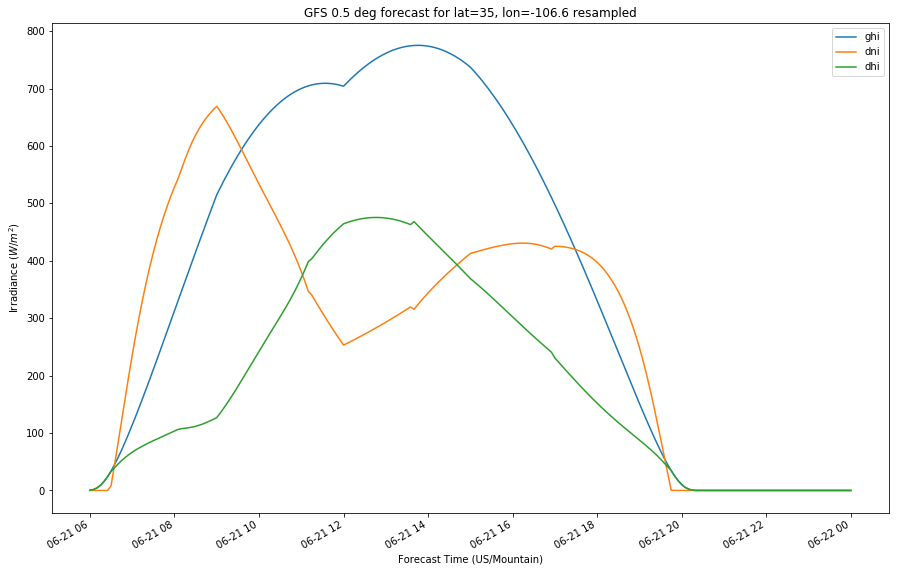

In [10]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

## Weather Models
### GFS
The Global Forecast System is the US model that provides forecast for the entire globe (6hr update)
### HRRR

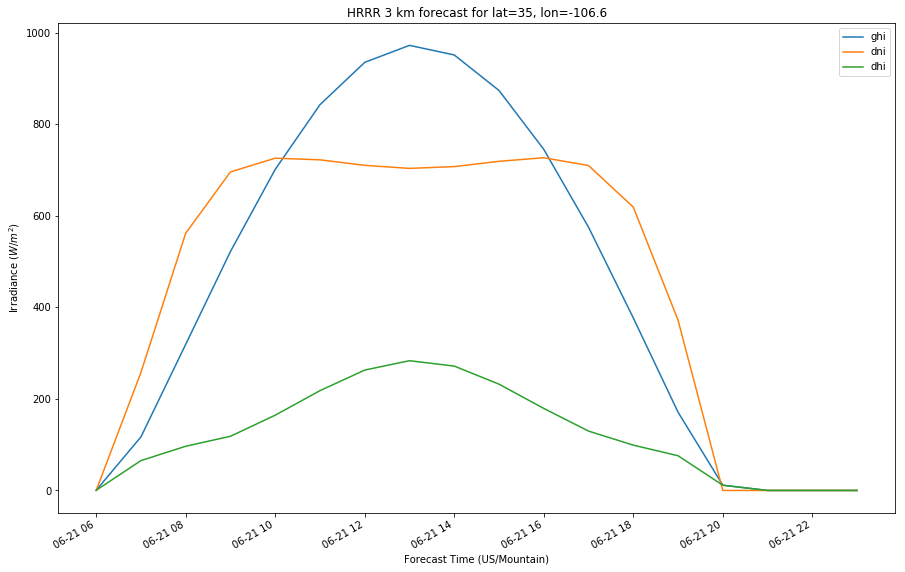

In [11]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [12]:
hrrr_data=data[irrad_vars]
hrrr_data.describe()

,ghi,dni,dhi
count,18.000000,18.000000,18.000000
mean,450.655978,457.150300,122.632044
std,381.645484,318.082357,100.855627
min,0.000000,0.000000,0.000000
25%,37.794763,64.393394,24.864114
50%,449.292116,657.182850,108.633212
75%,818.012868,709.888719,208.224110
max,971.996899,726.615837,283.323747


### RAP

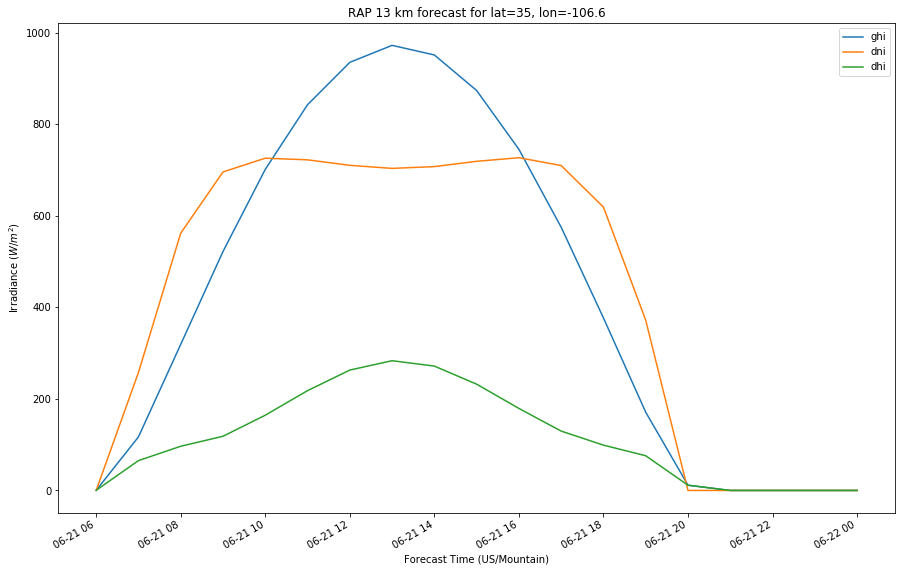

In [13]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

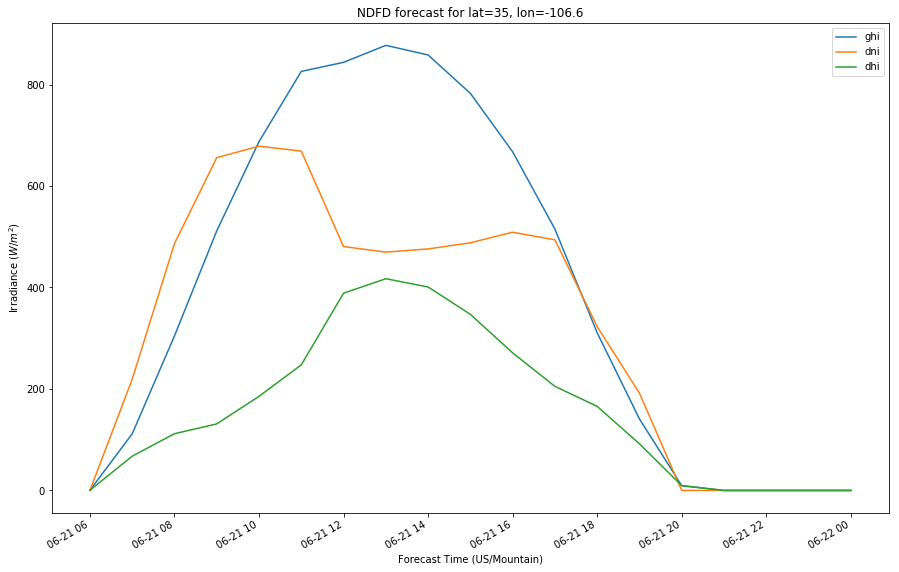

In [14]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [15]:
ndfd_data=data[irrad_vars]
ndfd_data.describe()

,ghi,dni,dhi
count,19.000000,19.000000,19.000000
mean,391.937372,323.208755,160.064058
std,354.405557,258.026243,149.305658
min,0.000000,0.000000,0.000000
25%,4.873071,0.000000,4.873071
50%,310.709277,469.698347,131.133749
75%,735.041159,491.039914,259.339818
max,877.227234,678.496130,417.302970


# PV Power Forecast - HRRR

In [42]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = HRRR()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [43]:
invdb = pvsystem.retrieve_sam('CECInverter')
invdb

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.08961,2.24041,1.84651,1.95054,1.76944,1.84378,46.8638,67.7909,62.5547,18.1663,...,36.0334,2.5301,22.0954,24.4658,42.7765,31.682,64.7742,54.5701,85.1457,62.4867
Paco,250,250,300,300,300,300,10000,10000,12000,3000,...,3180,230,1100,2000,2500,3000,3500,4600,4800,5200
Pdco,259.589,259.492,311.669,311.581,312.421,312.005,10488.3,10296,12358.8,3142.3,...,3315.65,245.63,1194.09,2161.88,2632.84,3205.93,3641.84,4797.81,4968.03,5382.86
Vdco,40,40,40,40,45,45,320,362,370,310,...,375,40,182,199,218,222.5,263,254,263,280
C0,-4.1e-05,-3.9e-05,-3.3e-05,-3.4e-05,-4.5e-05,-3.5e-05,-2.7759e-06,-1.38839e-06,-1.009e-06,-8.03949e-06,...,-7.98467e-06,6.2e-05,-2.1e-05,-1.3e-05,-1.4e-05,-8.21046e-06,-9.08073e-06,-5.99928e-06,-6.16035e-06,-4.63524e-06
C1,-9.1e-05,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-3.6e-05,-4.9e-05,-5.6e-05,-1.1e-05,...,-7.5e-05,-9.8e-05,5.7e-05,5.5e-05,6.1e-05,3.6e-05,3.5e-05,2.8e-05,3.4e-05,4.4e-05
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


## ModelChain Attributes

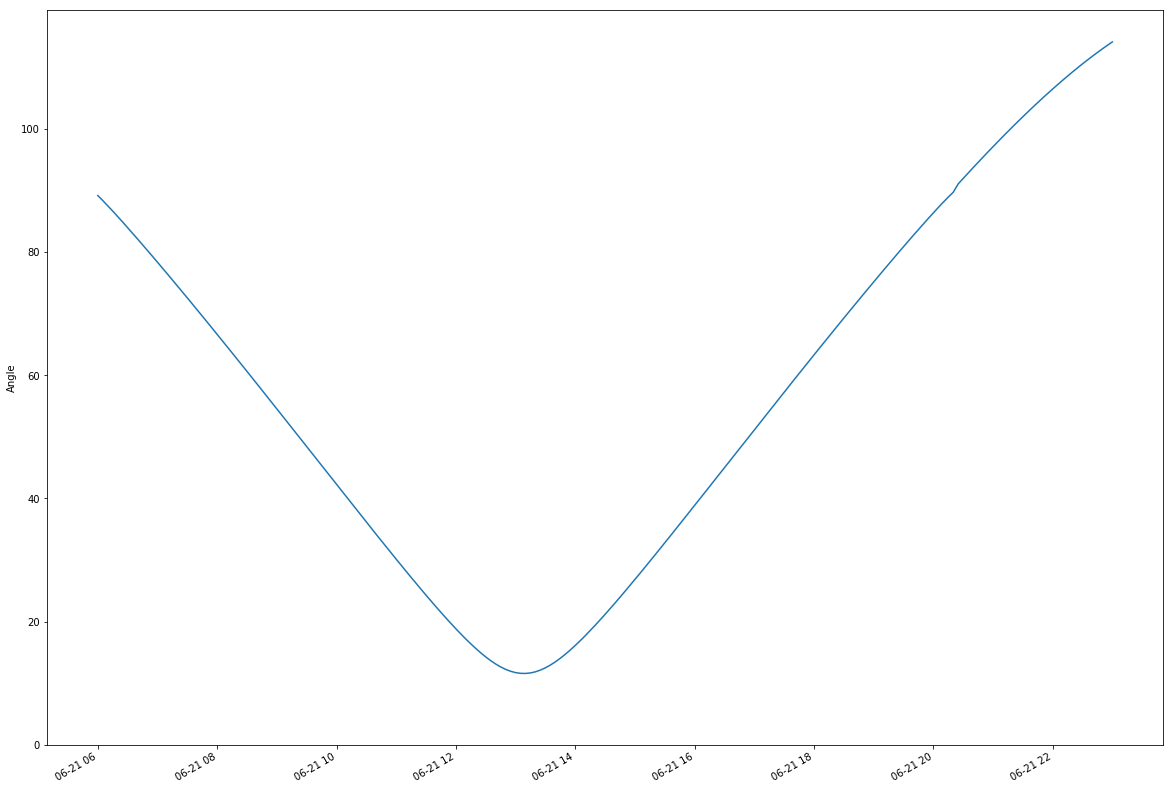

In [44]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

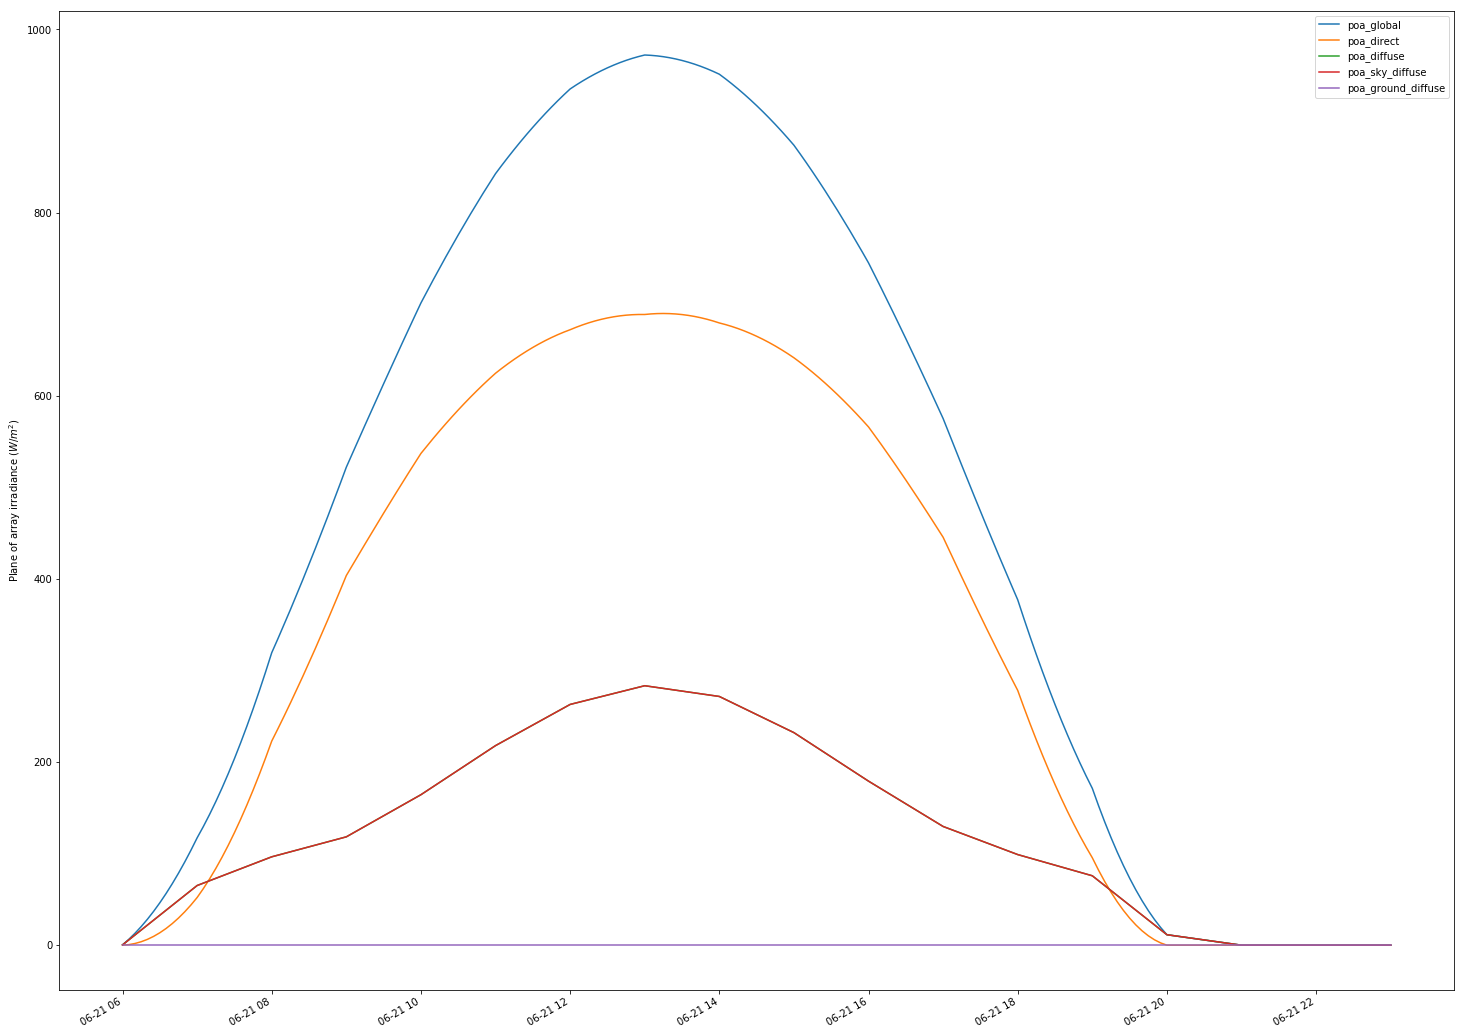

In [45]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

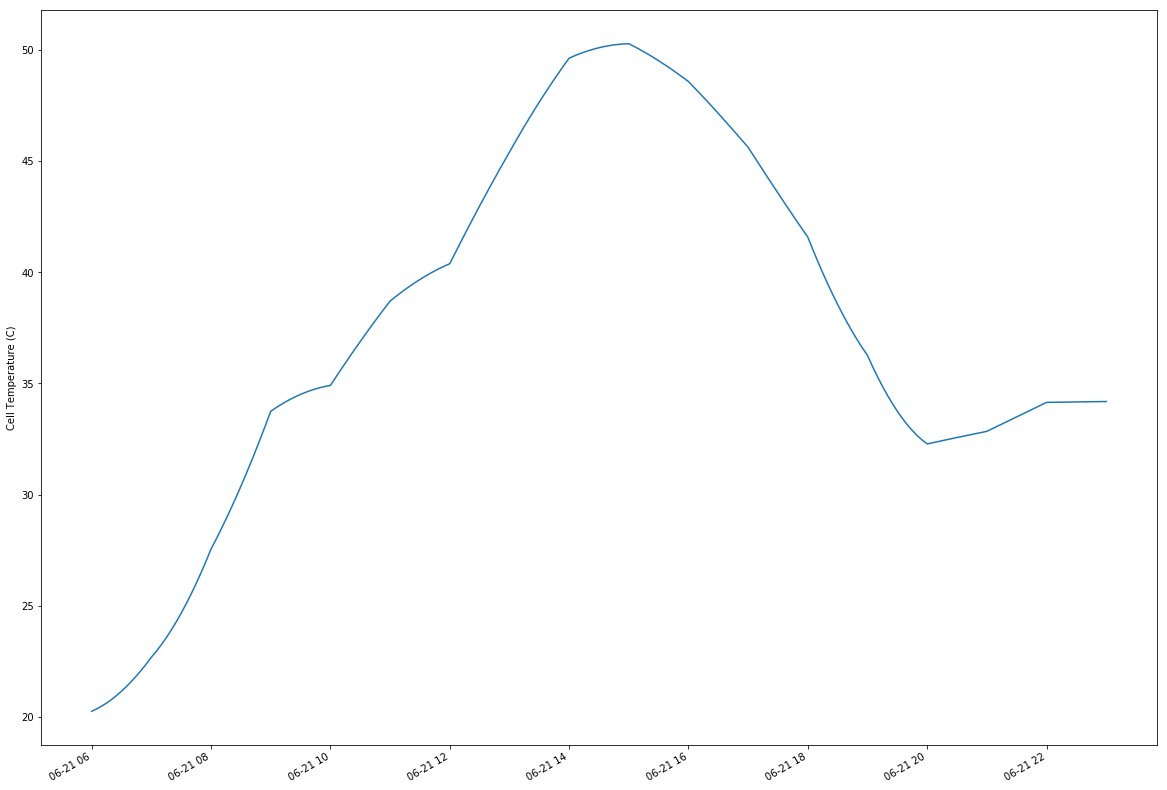

In [46]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

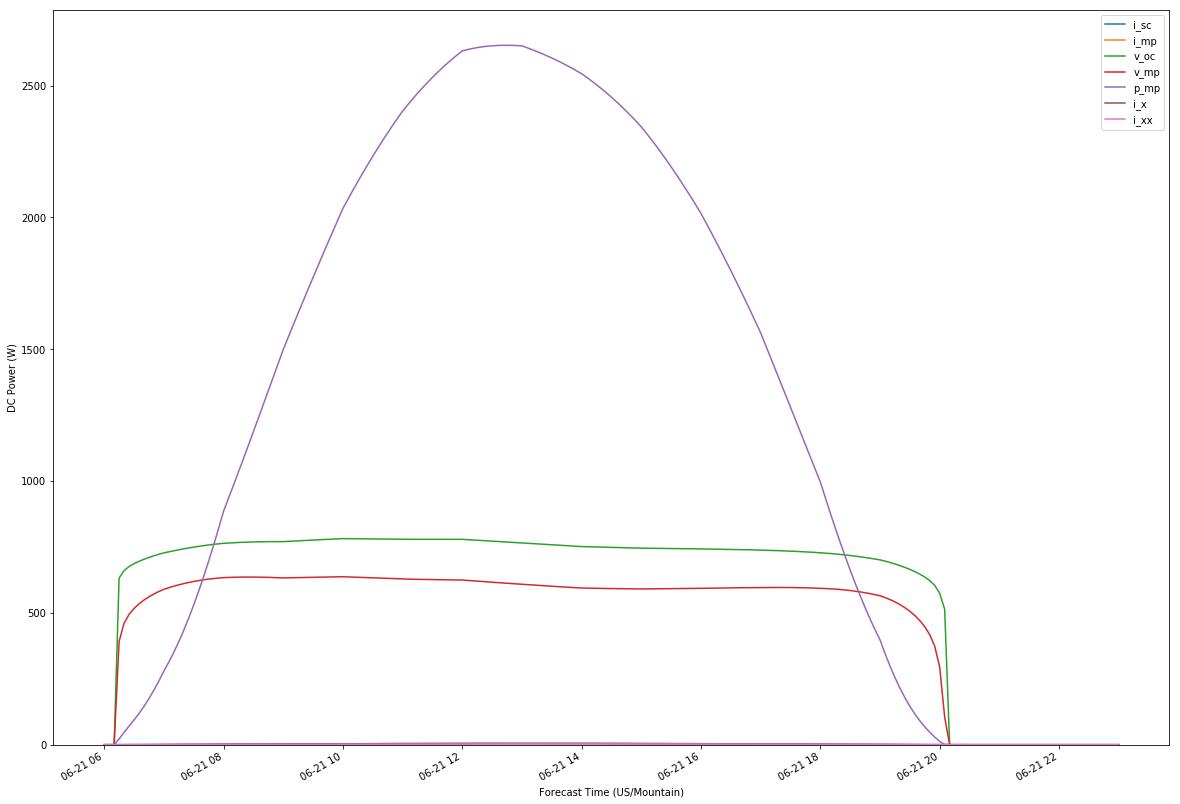

In [47]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [48]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2.386729,2.130191,605.079824,482.334436,1297.709686,2.330660,1.552851
std,1.867482,1.661968,291.696327,237.445502,1016.309008,1.824720,1.184710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319599,0.288287,685.500297,531.506202,145.864948,0.311329,0.229275
50%,2.486552,2.226075,742.834013,594.222810,1374.379691,2.425857,1.681681
75%,4.286331,3.824308,768.603523,624.711017,2320.659846,4.186954,2.751867
max,4.896505,4.355936,781.577088,636.990002,2652.640694,4.784966,3.088027


In [49]:
mc.dc.fillna(0).to_csv('DC June 21.csv', encoding='utf-8')

## MC AC Power

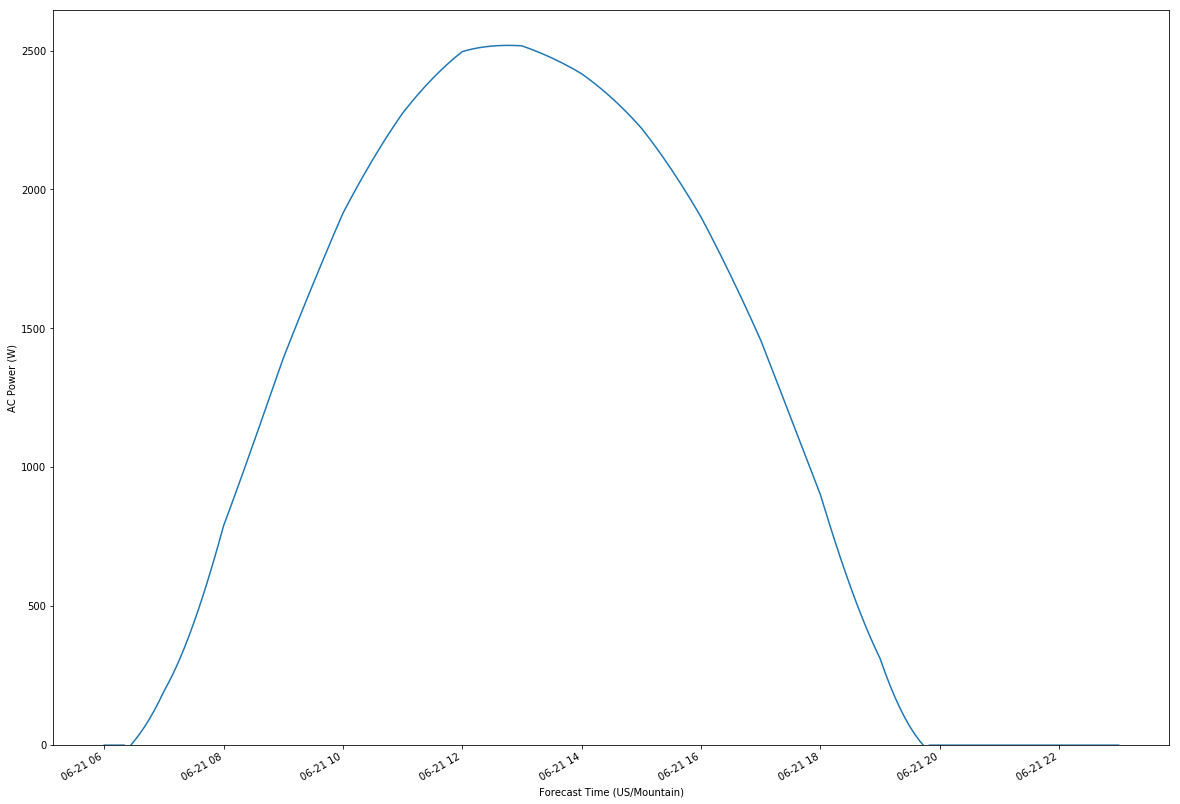

In [50]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [51]:
mc.ac.describe()

count     205.000000
mean     1209.548878
std       976.261892
min        -9.245517
25%        65.417001
50%      1273.349074
75%      2198.536742
max      2518.931756
dtype: float64

In [52]:
mc.ac.fillna(0)

2020-06-21 06:00:00-06:00      -1.560000
2020-06-21 06:05:00-06:00      -1.560000
2020-06-21 06:10:00-06:00      -1.560000
2020-06-21 06:15:00-06:00      -1.560000
2020-06-21 06:20:00-06:00      -1.560000
2020-06-21 06:25:00-06:00      -9.245517
2020-06-21 06:30:00-06:00      12.247304
2020-06-21 06:35:00-06:00      35.591710
2020-06-21 06:40:00-06:00      61.314186
2020-06-21 06:45:00-06:00      89.691153
2020-06-21 06:50:00-06:00     120.864204
2020-06-21 06:55:00-06:00     154.901572
2020-06-21 07:00:00-06:00     191.827624
2020-06-21 07:05:00-06:00     224.886317
2020-06-21 07:10:00-06:00     261.151756
2020-06-21 07:15:00-06:00     300.620443
2020-06-21 07:20:00-06:00     343.260536
2020-06-21 07:25:00-06:00     389.015523
2020-06-21 07:30:00-06:00     437.807610
2020-06-21 07:35:00-06:00     489.540993
2020-06-21 07:40:00-06:00     544.104895
2020-06-21 07:45:00-06:00     601.376471
2020-06-21 07:50:00-06:00     661.223484
2020-06-21 07:55:00-06:00     723.506718
2020-06-21 08:00

In [53]:
mc.ac.fillna(0).to_csv('AC June 21.csv', encoding='utf-8')

### HRRR Irradiance Data

In [54]:
hrrr_data

,ghi,dni,dhi
2020-06-21 06:00:00-06:00,0.334917,0.000000,0.334917
2020-06-21 07:00:00-06:00,116.880215,257.573574,65.157616
2020-06-21 08:00:00-06:00,319.023941,561.783943,96.497991
2020-06-21 09:00:00-06:00,521.738519,695.606425,118.314149
2020-06-21 10:00:00-06:00,701.132782,725.585184,164.312374
2020-06-21 11:00:00-06:00,842.380186,722.029387,217.922709
2020-06-21 12:00:00-06:00,934.900801,709.998287,262.886969
2020-06-21 13:00:00-06:00,971.996899,703.308493,283.323747
2020-06-21 14:00:00-06:00,951.018759,707.215843,271.591718
2020-06-21 15:00:00-06:00,873.461621,718.765390,232.101596


In [55]:
hrrr_data.to_csv('HRRR June 21.csv', encoding='utf-8')

# PV Power Forecast - NDFD

In [56]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = NDFD()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## ModelChain Attributes

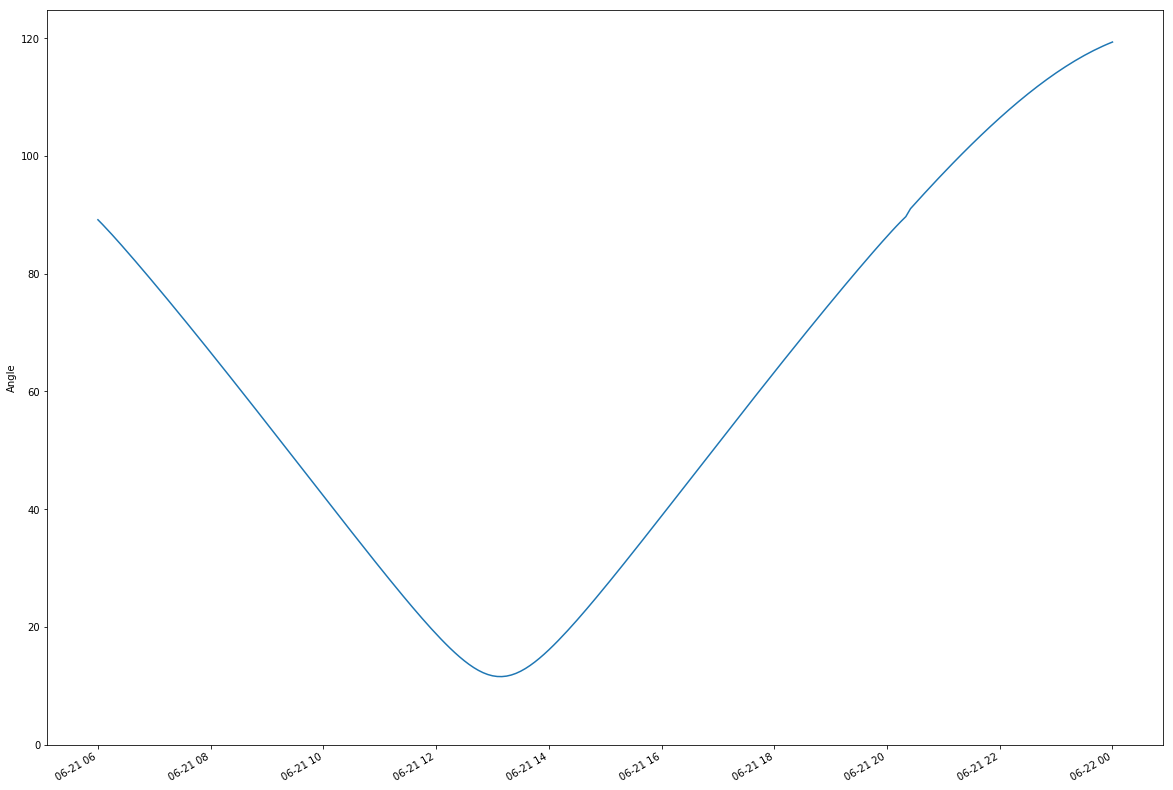

In [57]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

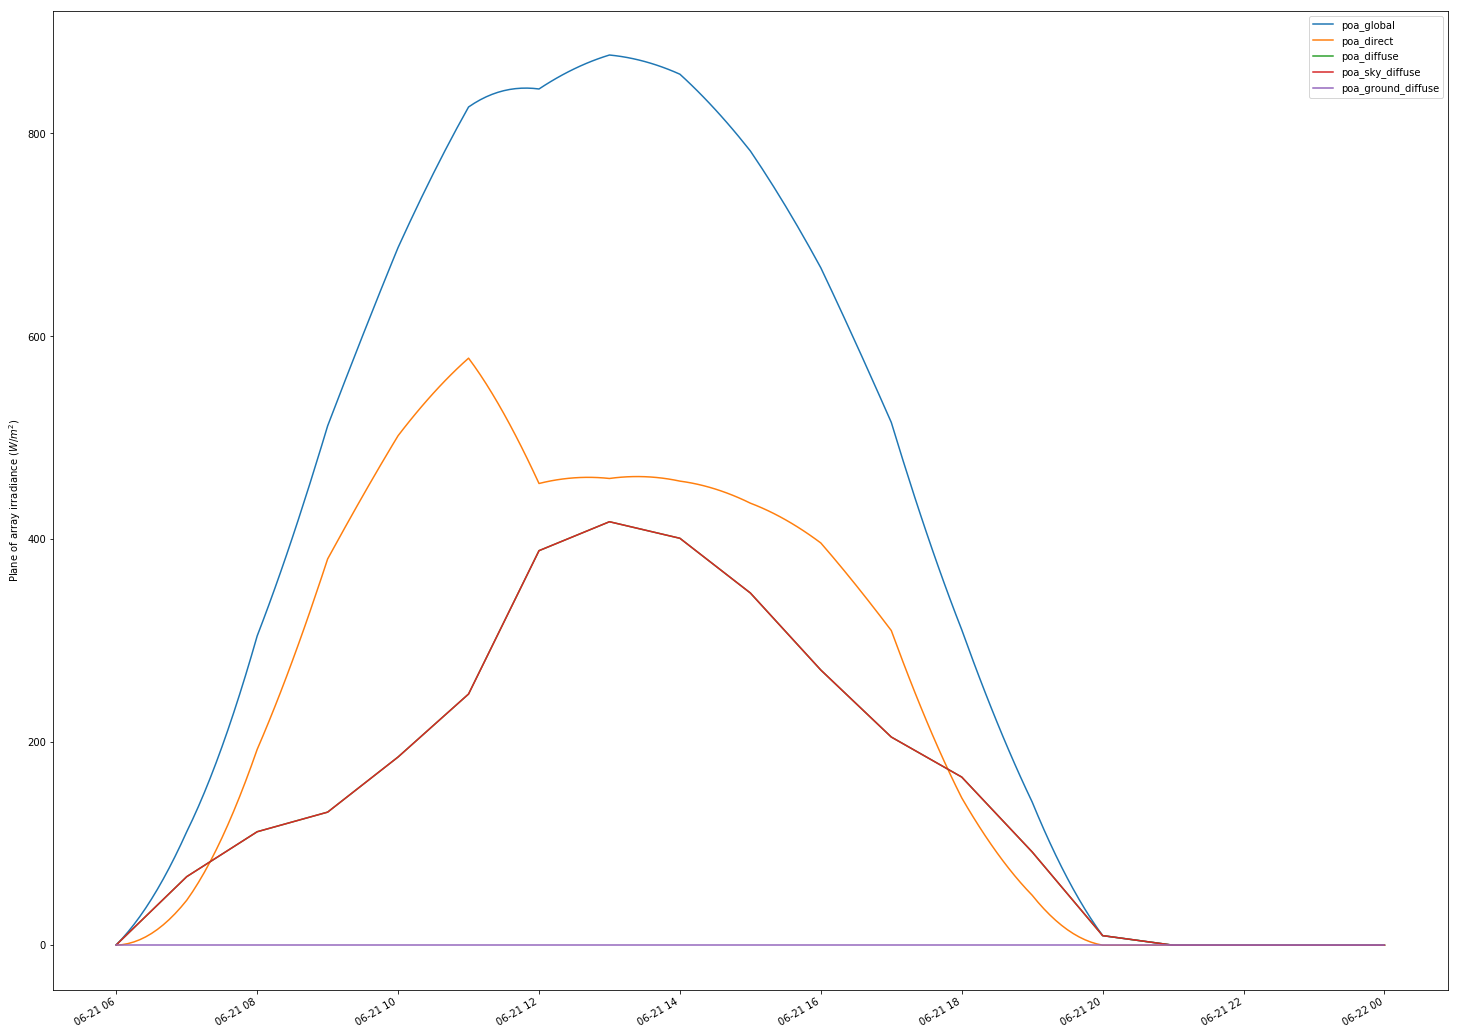

In [58]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

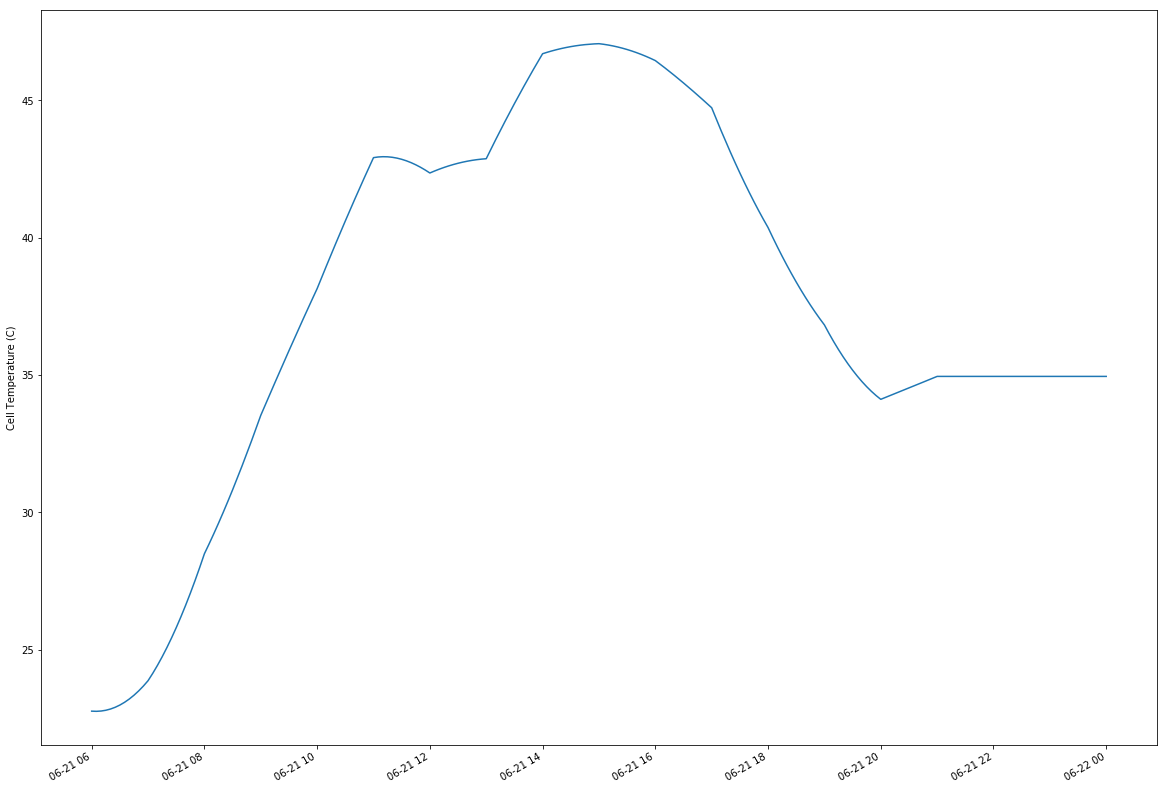

In [59]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

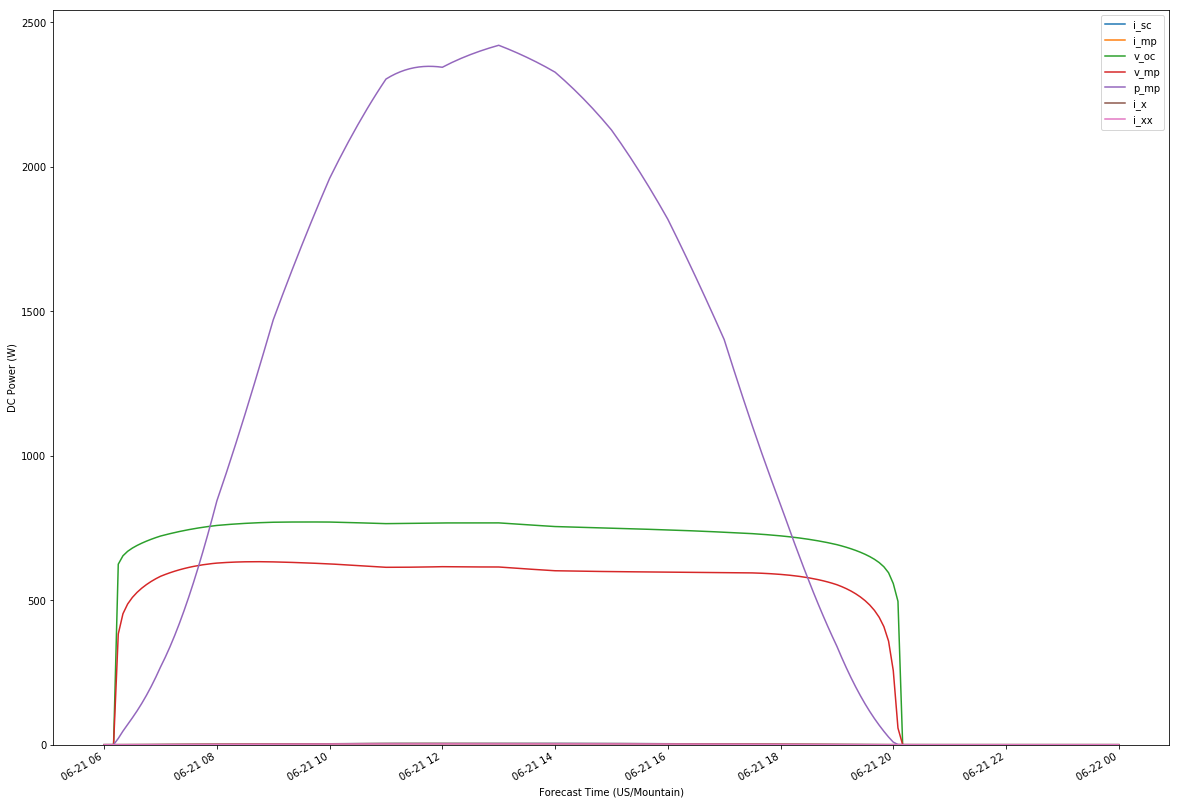

In [60]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [61]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.075787,1.854297,568.321707,453.135647,1128.248020,2.026580,1.362947
std,1.738415,1.549327,313.843747,255.217122,949.174335,1.698052,1.118218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114818,0.103865,624.738485,408.652105,46.284671,0.111831,0.082815
50%,2.011384,1.807826,740.321820,597.111653,1103.243479,1.961655,1.378049
75%,3.934707,3.511971,765.377132,615.034286,2127.565128,3.842534,2.552682
max,4.416608,3.935809,770.814362,633.346641,2420.612175,4.314580,2.825182


In [62]:
mc.dc.fillna(0).to_csv('NDFD DC June 21.csv', encoding='utf-8')

## MC AC Power

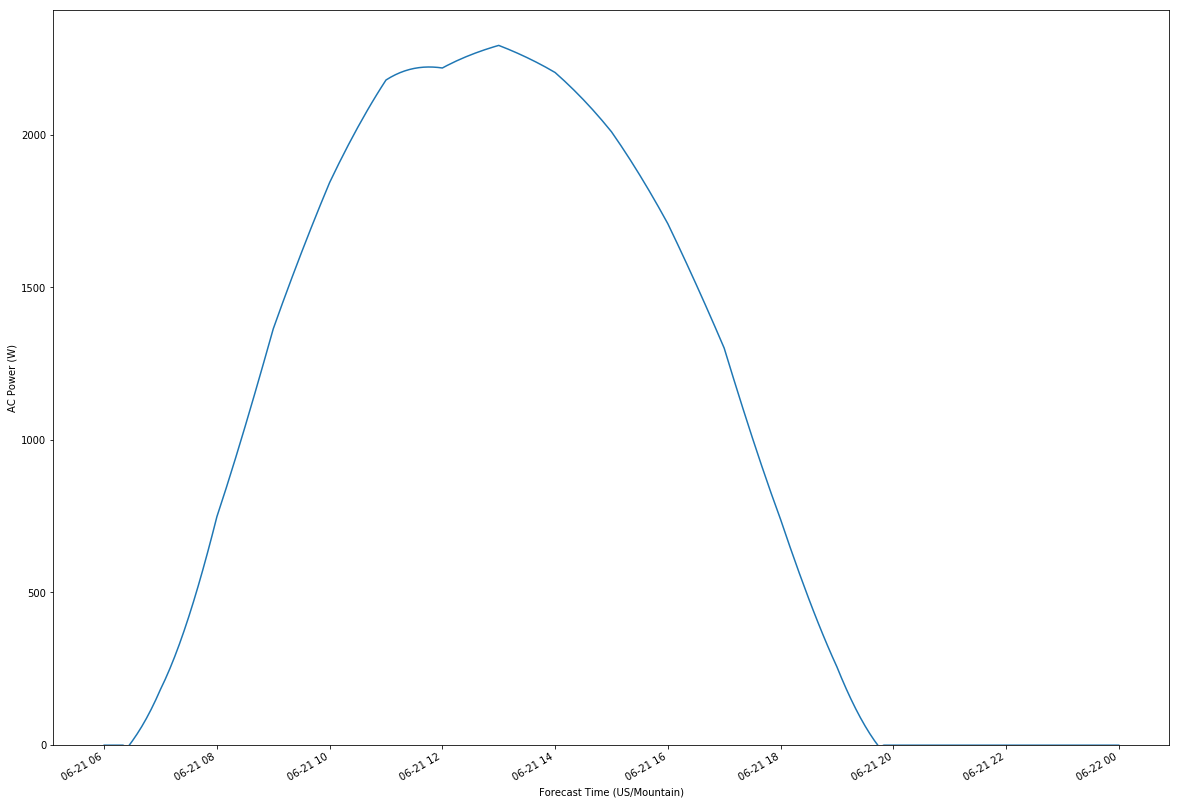

In [63]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [64]:
mc.ac.describe()

count     217.000000
mean     1047.439620
std       908.469165
min        -8.662720
25%        -1.560000
50%      1006.680960
75%      2010.263392
max      2293.443042
dtype: float64

In [65]:
mc.ac.fillna(0).to_csv('NDFD AC June 21.csv', encoding='utf-8')

### NDFD Irradiance Data

In [66]:
ndfd_data

,ghi,dni,dhi
2020-06-21 06:00:00-06:00,0.319678,0.000000,0.319678
2020-06-21 07:00:00-06:00,111.562160,219.170880,67.551095
2020-06-21 08:00:00-06:00,304.508339,486.469781,111.814775
2020-06-21 09:00:00-06:00,511.564609,655.959754,131.133749
2020-06-21 10:00:00-06:00,687.460681,678.496130,185.478863
2020-06-21 11:00:00-06:00,825.953757,668.813608,247.520711
2020-06-21 12:00:00-06:00,843.748004,480.685550,388.778824
2020-06-21 13:00:00-06:00,877.227234,469.698347,417.302970
2020-06-21 14:00:00-06:00,858.294462,476.015551,400.983104
2020-06-21 15:00:00-06:00,782.621636,488.123049,347.065591


In [67]:
ndfd_data.to_csv('NDFD June 21.csv', encoding='utf-8')